In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedBaggingClassifier

from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Metrics to evaluate the model
from sklearn.metrics import (
    f1_score,
    accuracy_score,   
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,

    classification_report,
    precision_recall_curve
)




In [125]:
df = pd.read_csv("term-deposit-marketing-2020.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [127]:
cat_cols = df.select_dtypes(include="object").columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'y'],
      dtype='object')

In [128]:
num_cols = df.select_dtypes(include="int64").columns
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign'], dtype='object')

In [129]:
for cat in cat_cols:
    print(cat)
    print(df[cat].value_counts())
    print("******************************")

job
blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64
******************************
marital
married     24386
single      10889
divorced     4725
Name: marital, dtype: int64
******************************
education
secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64
******************************
default
no     39191
yes      809
Name: default, dtype: int64
******************************
housing
yes    24031
no     15969
Name: housing, dtype: int64
******************************
loan
no     33070
yes     6930
Name: loan, dtype: int64
******************************
contact
cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64
******************************
month
may   

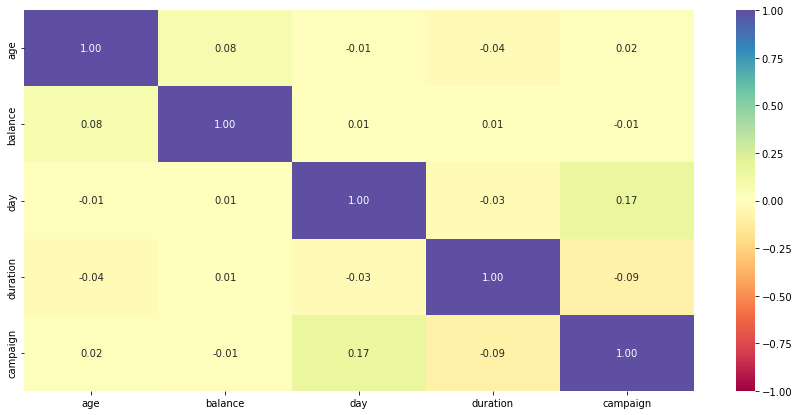

In [130]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [131]:
df[df['y'] == 'yes']["contact"].value_counts()

cellular     2233
unknown       497
telephone     166
Name: contact, dtype: int64

In [132]:
df[df['y'] == 'no']["contact"].value_counts()

cellular     22681
unknown      12268
telephone     2155
Name: contact, dtype: int64

In [133]:
for cat in cat_cols:
    print(cat)
    print(df[df['y'] == 'yes'][cat].value_counts())
    print("******************************")

job
management       676
blue-collar      535
technician       497
admin            351
services         238
retired          151
self-employed    112
unemployed        96
entrepreneur      88
student           82
housemaid         53
unknown           17
Name: job, dtype: int64
******************************
marital
married     1478
single      1027
divorced     391
Name: marital, dtype: int64
******************************
education
secondary    1418
tertiary     1029
primary       353
unknown        96
Name: education, dtype: int64
******************************
default
no     2847
yes      49
Name: default, dtype: int64
******************************
housing
yes    1464
no     1432
Name: housing, dtype: int64
******************************
loan
no     2516
yes     380
Name: loan, dtype: int64
******************************
contact
cellular     2233
unknown       497
telephone     166
Name: contact, dtype: int64
******************************
month
may    791
apr    451
jul    384
j

In [134]:
##df.drop(['contact'],axis=1, inplace=True)

In [135]:
## lets drop all unknow values as first rial #unknown
#df[(df['job'] != 'unknown') & (df['education'] != 'unknown')]
#df = df.query("job != 'unknown' and education != 'unknown'")
#df

In [136]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


<AxesSubplot:xlabel='age'>

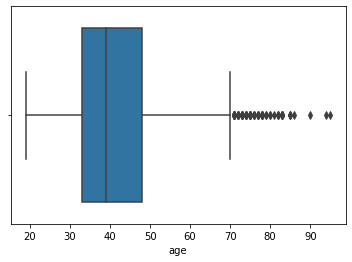

In [137]:
## lets keep the unknown values as first trial
sns.boxplot(x = df['age'])

C:\Users\abedq\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

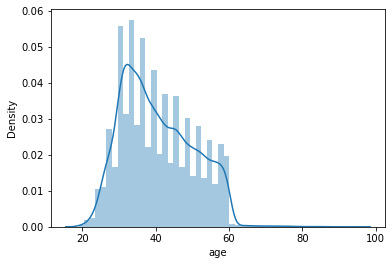

In [138]:
sns.distplot(df["age"])

C:\Users\abedq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance', ylabel='y'>

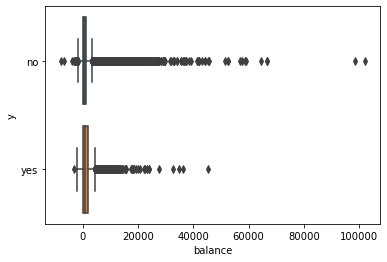

In [139]:
sns.boxplot(df['balance'], df['y'])

C:\Users\abedq\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

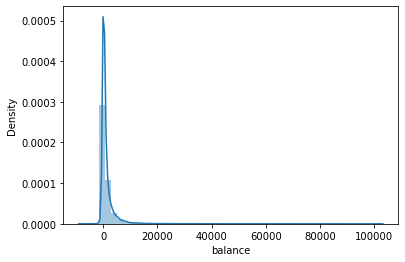

In [140]:
sns.distplot(df["balance"])

C:\Users\abedq\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

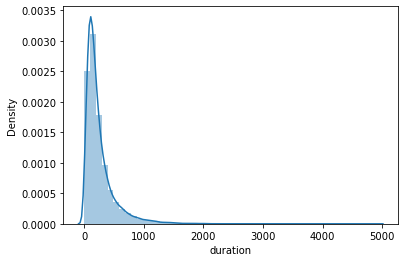

In [141]:
sns.distplot(df["duration"])

In [142]:
df.groupby(by=["y"])['duration'].mean()

y
no     221.408042
yes    682.958564
Name: duration, dtype: float64

<AxesSubplot:xlabel='duration', ylabel='y'>

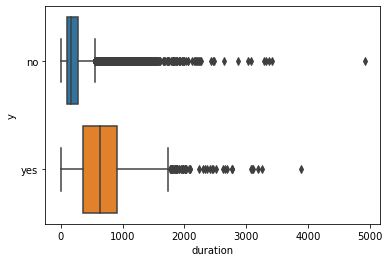

In [143]:
sns.boxplot(x = df['duration'], y =df["y"])

In [144]:
df2 = df.copy()

In [145]:
df['y'].value_counts()

no     37104
yes     2896
Name: y, dtype: int64

In [146]:
cat_cols = df.select_dtypes(include="object").columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'y'],
      dtype='object')

In [147]:
# lets use label encoder
le = LabelEncoder()
for  cat in cat_cols:
    le.fit(df[cat]) 
    keys = le.classes_
    values = le.transform(keys)
    my_dict = dict(zip(keys, values))
    df[cat] = df[cat].replace(my_dict)

In [148]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0


In [149]:
Y = df["y"]
X= df.drop(['y'], axis=1)

In [150]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        40000 non-null  int64
 1   job        40000 non-null  int32
 2   marital    40000 non-null  int32
 3   education  40000 non-null  int32
 4   default    40000 non-null  int32
 5   balance    40000 non-null  int64
 6   housing    40000 non-null  int32
 7   loan       40000 non-null  int32
 8   contact    40000 non-null  int32
 9   day        40000 non-null  int64
 10  month      40000 non-null  int32
 11  duration   40000 non-null  int64
 12  campaign   40000 non-null  int64
dtypes: int32(8), int64(5)
memory usage: 2.7 MB


In [151]:
X.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,4.266050,1.154100,1.199950,0.020225,1274.277550,0.600775,0.173250,0.696275,16.017225,5.509525,254.824300,2.882175
std,9.641776,3.291229,0.605485,0.741643,0.140771,2903.769716,0.489745,0.378468,0.921817,8.278127,2.909522,259.366498,3.239051
min,19.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,54.000000,0.000000,0.000000,0.000000,8.000000,3.000000,100.000000,1.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,407.000000,1.000000,0.000000,0.000000,17.000000,6.000000,175.000000,2.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1319.000000,1.000000,0.000000,2.000000,21.000000,8.000000,313.000000,3.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,10.000000,4918.000000,63.000000


In [152]:
##Lets split the data into tran test set befor starting the process of over sampling
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=12)


In [153]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
18758,39,3,1,1,0,315,1,0,0,31,5,90,13
30709,47,4,1,2,0,0,1,0,1,6,3,138,4
343,50,1,1,0,0,1533,1,0,2,5,8,325,2
39069,39,1,0,3,0,463,1,0,0,18,8,169,1
380,38,1,1,1,0,757,1,0,2,6,8,133,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18699,35,4,1,2,0,1078,1,0,0,31,5,48,4
26581,48,4,1,2,0,1348,0,0,0,20,9,124,1
16215,25,9,2,1,0,0,1,0,0,23,5,487,5
4500,34,7,2,1,0,8132,1,0,2,20,8,137,1


In [154]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


In [168]:
#Random Forest

n_estimators = [100, 125, 150]
criterion=['gini', 'entropy']
min_samples_split = [14, 15, 16]
class_weight=["balanced"]
rf = RandomForestClassifier()
parameters = dict(n_estimators=n_estimators, criterion=criterion, min_samples_split=min_samples_split, class_weight=class_weight)
grid_search_rf = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(n_splits=5),
                           n_jobs = -1)
grid_search_rf = grid_search_rf.fit(X_train,Y_train)

In [169]:
grid_search_rf.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'min_samples_split': 14,
 'n_estimators': 150}

In [170]:
grid_search_rf.best_score_

0.9242647058823529

In [171]:
grid_search_rf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      5566
           1       0.51      0.73      0.60       434

    accuracy                           0.93      6000
   macro avg       0.74      0.84      0.78      6000
weighted avg       0.94      0.93      0.94      6000



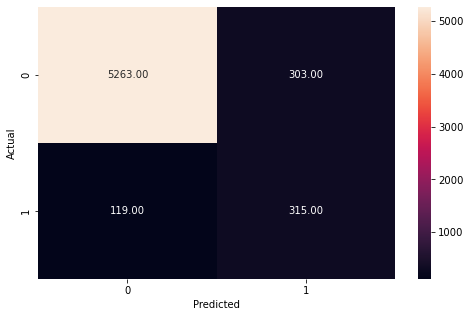

In [172]:
prd_test_rf = grid_search_rf.predict(X_test)
metrics_score(Y_test, prd_test_rf)

In [173]:
roc_auc_score(Y_test, prd_test_rf)

0.8356843972042238

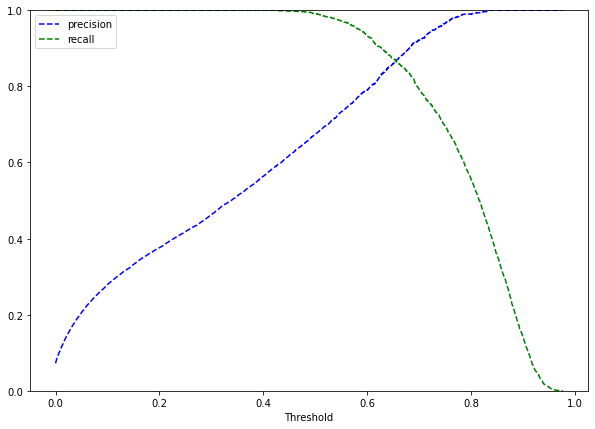

In [174]:
y_scores_rf=grid_search_rf.predict_proba(X_train) #predict_proba gives the probability of each observation belonging to each class


precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(Y_train, y_scores_rf[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_rf, precisions_rf[:-1], 'b--', label='precision')
plt.plot(thresholds_rf, recalls_rf[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [175]:
#calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds_rf)):
    if precisions_rf[i]==recalls_rf[i]:
        print(thresholds_rf[i])

0.6548740066155277


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5566
           1       0.63      0.42      0.50       434

    accuracy                           0.94      6000
   macro avg       0.79      0.70      0.74      6000
weighted avg       0.93      0.94      0.93      6000



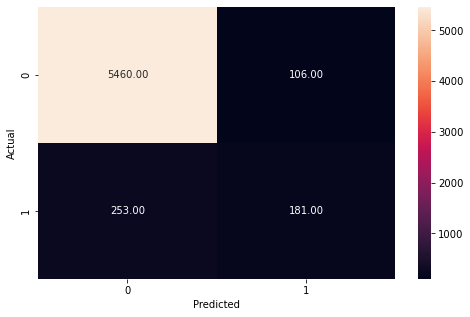

In [176]:
optimal_threshold1 = 0.68
y_pred_test = grid_search_rf.predict_proba(X_test)
metrics_score(Y_test, y_pred_test[:,1]>optimal_threshold1)

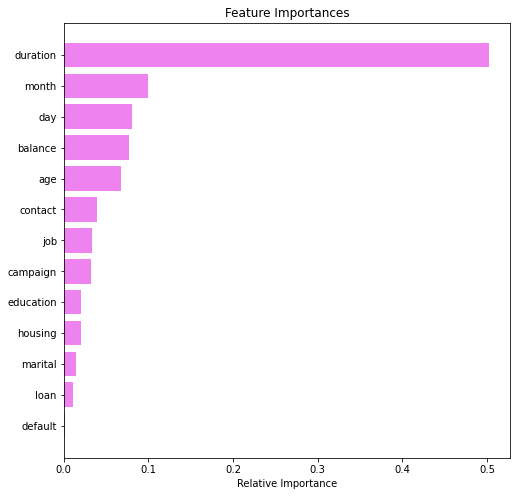

In [177]:
# importance of features in the tree building

feature_names = list(X.columns)
importances = grid_search_rf.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [178]:
##Logistic Regression
lg = LogisticRegression(class_weight="balanced")
lg.fit(X_train, Y_train)

C:\Users\abedq\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      5566
           1       0.28      0.79      0.42       434

    accuracy                           0.84      6000
   macro avg       0.63      0.81      0.66      6000
weighted avg       0.93      0.84      0.87      6000



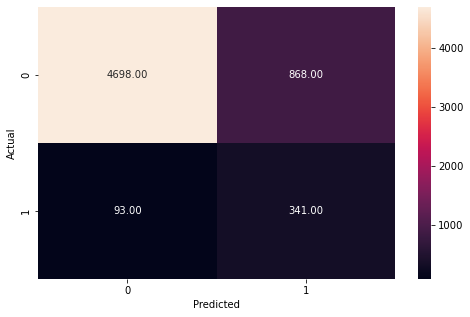

In [179]:
prd_test_lg = lg.predict(X_test)
metrics_score(Y_test, prd_test_lg)

In [180]:
roc_auc_score(Y_test, prd_test_lg)

0.8148837328679225

In [181]:
#printing the coefficients of logistic regression
cols=X_train.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)

,0
education,0.112965
duration,0.005833
day,0.001474
balance,0.000049
default,-0.011373
age,-0.023539
month,-0.034672
job,-0.046235
marital,-0.086116
loan,-0.158281


In [182]:
odds = np.exp(lg.coef_[0]) #finding the odds

# adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False) 

,odds
education,1.119593
duration,1.005850
day,1.001475
balance,1.000049
default,0.988691
age,0.976736
month,0.965922
job,0.954817
marital,0.917488
loan,0.853610


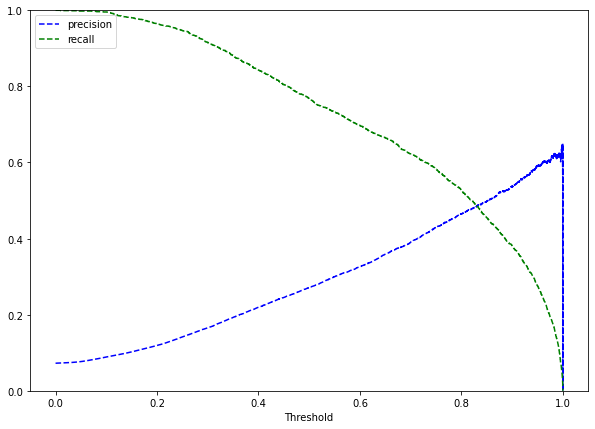

In [183]:
y_scores_lg=lg.predict_proba(X_train) #predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(Y_train, y_scores_lg[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [184]:
#calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds_lg)):
    if precisions_lg[i]==recalls_lg[i]:
        print(thresholds_lg[i])

0.8307448094416867
0.9999999159643547
0.9999999732652736
0.9999999814766446
0.9999999915422862
0.999999999994392


              precision    recall  f1-score   support

           0       0.96      0.95      0.96      5566
           1       0.48      0.53      0.50       434

    accuracy                           0.92      6000
   macro avg       0.72      0.74      0.73      6000
weighted avg       0.93      0.92      0.93      6000



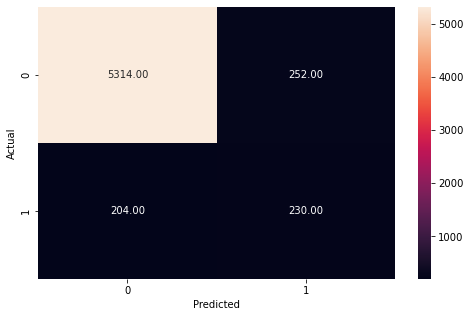

In [185]:
optimal_threshold1=.82
y_pred_test = lg.predict_proba(X_test)
metrics_score(Y_test, y_pred_test[:,1]>optimal_threshold1)

In [186]:
#CVM
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
#X_resampled =scaling.transform(X_train)
X_train_scal = scaling.transform(X_train)
X_test_scal = scaling.transform(X_test)

In [94]:
#fitting SVM
svm = SVC(class_weight="balanced") #linear kernal or linear decision boundary
model = svm.fit(X = X_train_scal, y = Y_train)

C:\Users\abedq\anaconda3\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5566
           1       0.07      1.00      0.13       434

    accuracy                           0.07      6000
   macro avg       0.04      0.50      0.07      6000
weighted avg       0.01      0.07      0.01      6000



C:\Users\abedq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abedq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abedq\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


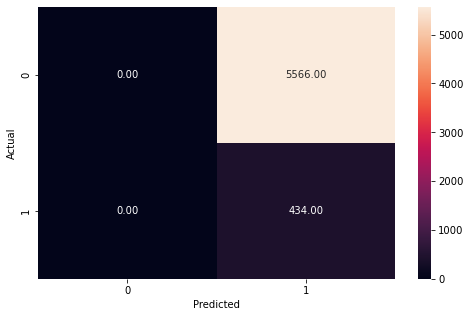

In [95]:
# Checking performance on the test data
y_pred_test_svm = model.predict(X_test)
metrics_score(Y_test, y_pred_test_svm)

In [ ]:
roc_auc_score(Y_test, y_pred_test_svm)

In [96]:
scores_svm = cross_val_score(svm, X_trin, Y_train, cv=5, n_jobs=-1)
scores_svm

array([0.79541852, 0.80229885, 0.79635355, 0.79603646, 0.79167658])

In [97]:
scores_svm.mean()

0.7963567908281225

In [187]:
##Decision Tree Classifier
dt = DecisionTreeClassifier()
scores_dt = cross_val_score(dt, X_train, Y_train, cv=5, n_jobs=-1)
scores_dt

array([0.91455882, 0.91485294, 0.91941176, 0.91264706, 0.91132353])

In [188]:
scores_dt.mean()

0.9145588235294119

In [189]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5566
           1       0.40      0.42      0.41       434

    accuracy                           0.91      6000
   macro avg       0.68      0.69      0.68      6000
weighted avg       0.91      0.91      0.91      6000



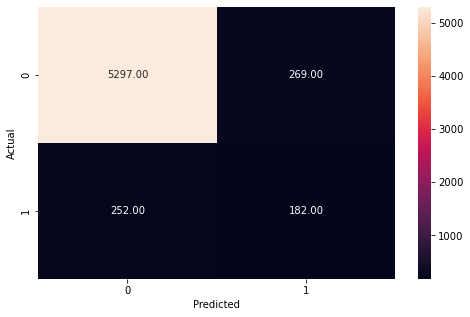

In [190]:
# Checking performance on the test data
y_pred_test_dt = dt.predict(X_test)
metrics_score(Y_test, y_pred_test_dt)

In [191]:
roc_auc_score(Y_test, y_pred_test_dt)

0.6855128487475803

In [192]:
##Balanced Bagging Classifier
bbc = BalancedBaggingClassifier(estimator=dt, n_estimators=100, replacement=False, sampling_strategy='majority', n_jobs=-1)
bbc.fit(X_train,Y_train)

BalancedBaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                          n_jobs=-1, sampling_strategy='majority')

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      5566
           1       0.38      0.91      0.54       434

    accuracy                           0.89      6000
   macro avg       0.69      0.90      0.74      6000
weighted avg       0.95      0.89      0.91      6000



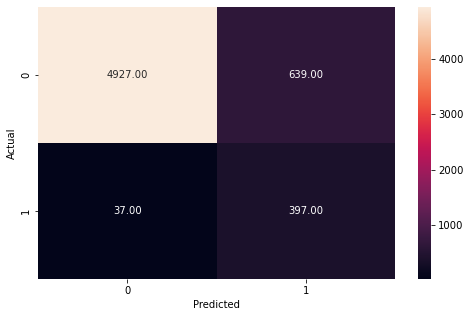

In [193]:
y_pred_test_bbc = bbc.predict(X_test)
metrics_score(Y_test, y_pred_test_bbc)

In [194]:
roc_auc_score(Y_test, y_pred_test_bbc)

0.8999711878074749

In [195]:
## lets use oversampling and try the same algorithms

# define the SMOTE object
sm = SMOTE()
# apply SMOTE to the data
X_resampled, y_resampled = sm.fit_resample(X_train, Y_train)



In [196]:
#Random Forest.

n_estimators = [250, 275, 300]
criterion=['gini', 'entropy']
min_samples_split = [ 19, 20, 21]
class_weight=["balanced"]
rf = RandomForestClassifier()
parameters = dict(n_estimators=n_estimators, criterion=criterion, min_samples_split=min_samples_split, class_weight=class_weight)
grid_search_rf = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(n_splits=5),
                           n_jobs = -1)
grid_search_rf = grid_search_rf.fit(X_resampled,y_resampled)

In [198]:
grid_search_rf.best_score_

0.9377742147009718

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      5566
           1       0.43      0.67      0.53       434

    accuracy                           0.91      6000
   macro avg       0.70      0.80      0.74      6000
weighted avg       0.93      0.91      0.92      6000



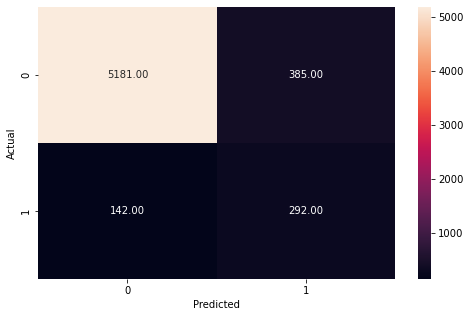

In [199]:
prd_test_rf2 = grid_search_rf.predict(X_test)
metrics_score(Y_test, prd_test_rf2)

In [200]:
roc_auc_score(Y_test, prd_test_rf2)

0.8018205497167628

In [201]:
## Logistc Regression
lg = LogisticRegression(class_weight="balanced")
lg.fit(X_resampled,y_resampled)

C:\Users\abedq\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      5566
           1       0.29      0.74      0.41       434

    accuracy                           0.85      6000
   macro avg       0.63      0.80      0.66      6000
weighted avg       0.93      0.85      0.88      6000



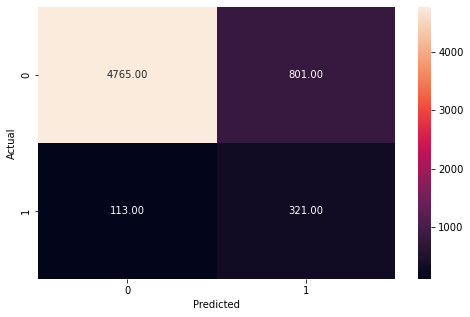

In [202]:
y_pred_test_lg2 = lg.predict(X_test)
metrics_score(Y_test, y_pred_test_lg2)

In [203]:
roc_auc_score(Y_test, y_pred_test_lg2)

0.7978609430859844

In [204]:
##Decision Tree Classifier
dt = DecisionTreeClassifier()
scores_dt = cross_val_score(dt, X_resampled,y_resampled, cv=5, n_jobs=-1)
scores_dt

array([0.88157895, 0.93642489, 0.93428458, 0.93357115, 0.93388823])

In [205]:
scores_dt.mean()

0.9239495587959198

In [206]:
dt.fit(X_resampled,y_resampled)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      5566
           1       0.35      0.58      0.43       434

    accuracy                           0.89      6000
   macro avg       0.66      0.75      0.69      6000
weighted avg       0.92      0.89      0.90      6000



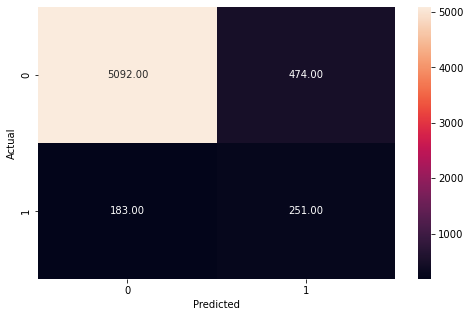

In [207]:
y_pred_test_dt2 = dt.predict(X_test)
metrics_score(Y_test, y_pred_test_dt2)

In [208]:
roc_auc_score(Y_test, y_pred_test_dt2)

0.7465905572178682

In [212]:
##Balanced Bagging Classifier
bbc = BalancedBaggingClassifier(estimator=dt, n_estimators=200, replacement=False, n_jobs=-1)
bbc.fit(X_resampled,y_resampled)

BalancedBaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=200,
                          n_jobs=-1)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      5566
           1       0.45      0.62      0.52       434

    accuracy                           0.92      6000
   macro avg       0.71      0.78      0.74      6000
weighted avg       0.93      0.92      0.92      6000



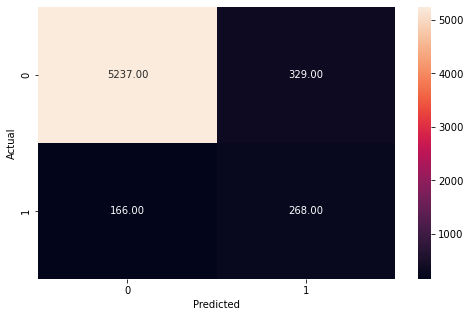

In [213]:
y_pred_test_bbc2 = bbc.predict(X_test)
metrics_score(Y_test, y_pred_test_bbc2)

In [214]:
roc_auc_score(Y_test, y_pred_test_bbc2)

0.7792013227114593